In [1]:
from google.colab import files
uploaded = files.upload()

Saving airline_passengers.csv to airline_passengers.csv


In [2]:
import pandas as pd

In [3]:
airline=pd.read_csv('airline_passengers.csv')
airline

,Month,Thousands of Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121
...,...,...
139,1960-08,606
140,1960-09,508
141,1960-10,461
142,1960-11,390


In [4]:
airline=pd.read_csv('airline_passengers.csv',index_col="Month",parse_dates=True)
airline

,Thousands of Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121
...,...
1960-08-01,606
1960-09-01,508
1960-10-01,461


In [5]:
airline['12-month-SMA']=airline['Thousands of Passengers'].rolling(window=12).mean()
airline['120-month-SMA']=airline['Thousands of Passengers'].rolling(window=120).mean()
airline['1200-month-SMA']=airline['Thousands of Passengers'].rolling(window=1200).mean()
airline['12000-month-SMA']=airline['Thousands of Passengers'].rolling(window=12000).mean()
airline['1800-month-SMA']=airline['Thousands of Passengers'].rolling(window=1800).mean()

<Axes: xlabel='Month'>

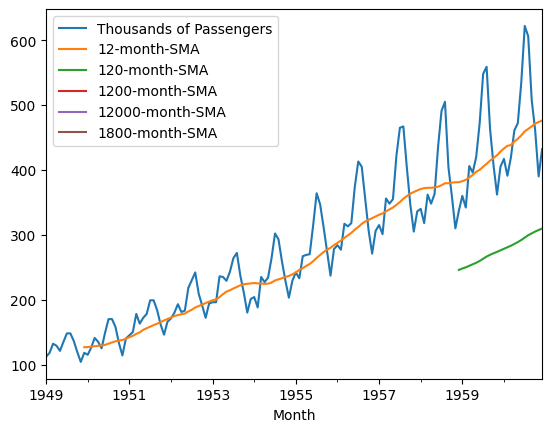

In [6]:
airline.plot()

In [7]:
airline_1=airline

In [8]:
airline_1['EWMA12']=airline_1['Thousands of Passengers'].ewm(span=12,adjust=False).mean()
airline_1['EWMA120']=airline_1['Thousands of Passengers'].ewm(span=120,adjust=False).mean()
airline_1['EWMA1200']=airline_1['Thousands of Passengers'].ewm(span=1200,adjust=False).mean()
airline_1['EWMA12000']=airline_1['Thousands of Passengers'].ewm(span=12000,adjust=False).mean()


<Axes: xlabel='Month'>

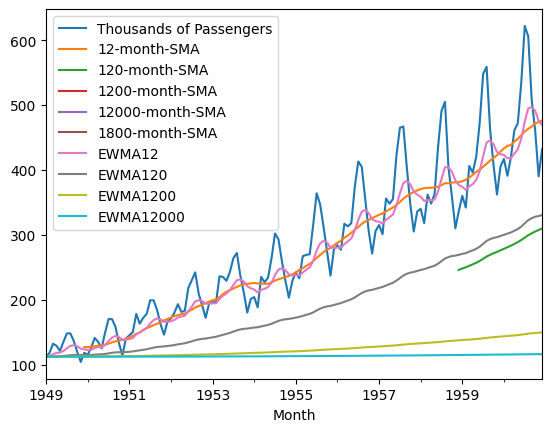

In [9]:
airline_1.plot()

In [10]:
airline_1

,Thousands of Passengers,12-month-SMA,120-month-SMA,1200-month-SMA,12000-month-SMA,1800-month-SMA,EWMA12,EWMA120,EWMA1200,EWMA12000
Month,,,,,,,,,,
1949-01-01,112,NaN,NaN,NaN,NaN,NaN,112.000000,112.000000,112.000000,112.000000
1949-02-01,118,NaN,NaN,NaN,NaN,NaN,112.923077,112.099174,112.009992,112.001000
1949-03-01,132,NaN,NaN,NaN,NaN,NaN,115.857988,112.428113,112.043281,112.004333
1949-04-01,129,NaN,NaN,NaN,NaN,NaN,117.879836,112.702028,112.071518,112.007165
1949-05-01,121,NaN,NaN,NaN,NaN,NaN,118.359861,112.839185,112.086387,112.008664
...,...,...,...,...,...,...,...,...,...,...
1960-08-01,606,463.333333,299.341667,NaN,NaN,NaN,494.898619,322.504575,147.552158,115.788004
1960-09-01,508,467.083333,302.258333,NaN,NaN,NaN,496.914216,325.570615,148.152404,115.853368
1960-10-01,461,471.583333,304.991667,NaN,NaN,NaN,491.388952,327.809117,148.673382,115.910887


# **LETS TRY WITH META-LIB PROPHET**

In [11]:
from google.colab import files
uploaded = files.upload()

Saving airline_passengers.csv to airline_passengers (1).csv


In [12]:
!pip install prophet

In [13]:
import pandas as pd

In [15]:
airline=pd.read_csv('airline_passengers.csv')
airline

,Month,Thousands of Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121
...,...,...
139,1960-08,606
140,1960-09,508
141,1960-10,461
142,1960-11,390


In [16]:
from prophet import Prophet

In [17]:
airline.columns=['ds','y']
airline['ds']=pd.to_datetime(airline['ds'])
airline

,ds,y
0,1949-01-01,112
1,1949-02-01,118
2,1949-03-01,132
3,1949-04-01,129
4,1949-05-01,121
...,...,...
139,1960-08-01,606
140,1960-09-01,508
141,1960-10-01,461
142,1960-11-01,390


In [18]:
m=Prophet()
m.fit(airline)

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp0a4hrn9h/mxg9pk04.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp0a4hrn9h/a78r3bpq.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=32541', 'data', 'file=/tmp/tmp0a4hrn9h/mxg9pk04.json', 'init=/tmp/tmp0a4hrn9h/a78r3bpq.json', 'output', 'file=/tmp/tmp0a4hrn9h/prophet_modelal81ijwy/prophet_model-20250214050922.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
05:09:22 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
05:09:22 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [19]:
future = m.make_future_dataframe(periods=1200,freq='MS')

In [20]:
airline.tail()

,ds,y
139,1960-08-01,606
140,1960-09-01,508
141,1960-10-01,461
142,1960-11-01,390
143,1960-12-01,432


In [21]:
forecast=m.predict(future)

In [22]:
forecast.tail()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
1339,2060-08-01,4162.301449,3515.805591,4888.074904,3448.152083,4823.220001,68.481906,68.481906,68.481906,68.481906,68.481906,68.481906,0.0,0.0,0.0,4230.783355
1340,2060-09-01,4165.433098,3464.458648,4846.271241,3450.414077,4827.411447,16.162119,16.162119,16.162119,16.162119,16.162119,16.162119,0.0,0.0,0.0,4181.595218
1341,2060-10-01,4168.463727,3428.661797,4799.062331,3452.571389,4831.476042,-21.476004,-21.476004,-21.476004,-21.476004,-21.476004,-21.476004,0.0,0.0,0.0,4146.987723
1342,2060-11-01,4171.595376,3386.055544,4773.950333,3454.829722,4835.616804,-59.460769,-59.460769,-59.460769,-59.460769,-59.460769,-59.460769,0.0,0.0,0.0,4112.134606
1343,2060-12-01,4174.626004,3407.441538,4811.972231,3456.991078,4839.656545,-33.345930,-33.345930,-33.345930,-33.345930,-33.345930,-33.345930,0.0,0.0,0.0,4141.280074


In [23]:
forecast[['ds','yhat','yhat_lower','yhat_upper']].tail(12)

,ds,yhat,yhat_lower,yhat_upper
1332,2060-01-01,4116.195883,3397.489286,4766.544420
1333,2060-02-01,4109.161527,3408.481096,4760.786215
1334,2060-03-01,4144.769800,3418.005006,4800.074820
1335,2060-04-01,4146.005503,3434.869436,4809.119093
1336,2060-05-01,4148.589275,3437.731624,4798.056359
1337,2060-06-01,4191.356469,3475.363937,4859.899168
1338,2060-07-01,4229.885549,3510.423586,4889.721346
1339,2060-08-01,4230.783355,3515.805591,4888.074904
1340,2060-09-01,4181.595218,3464.458648,4846.271241
1341,2060-10-01,4146.987723,3428.661797,4799.062331


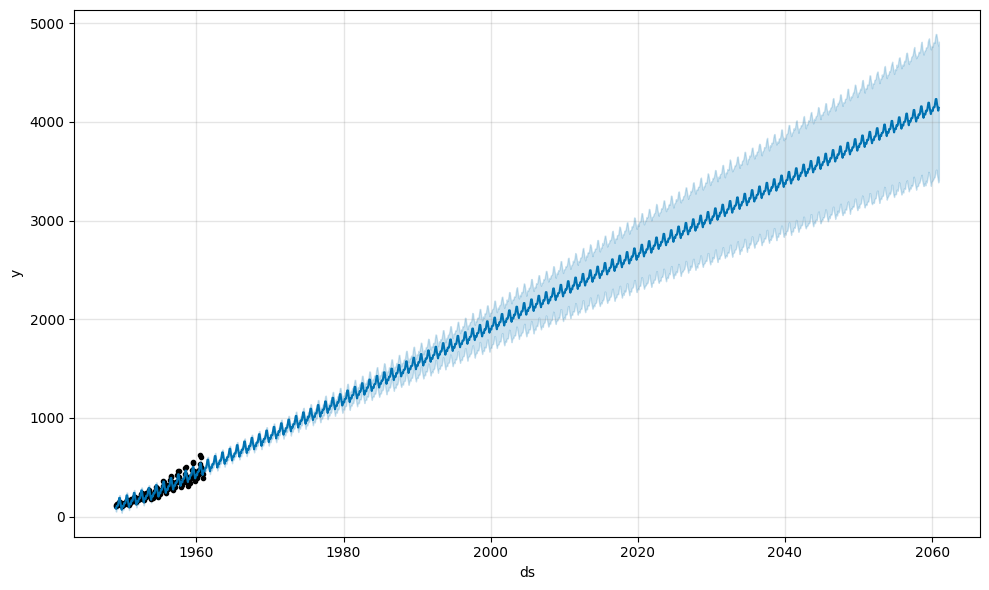

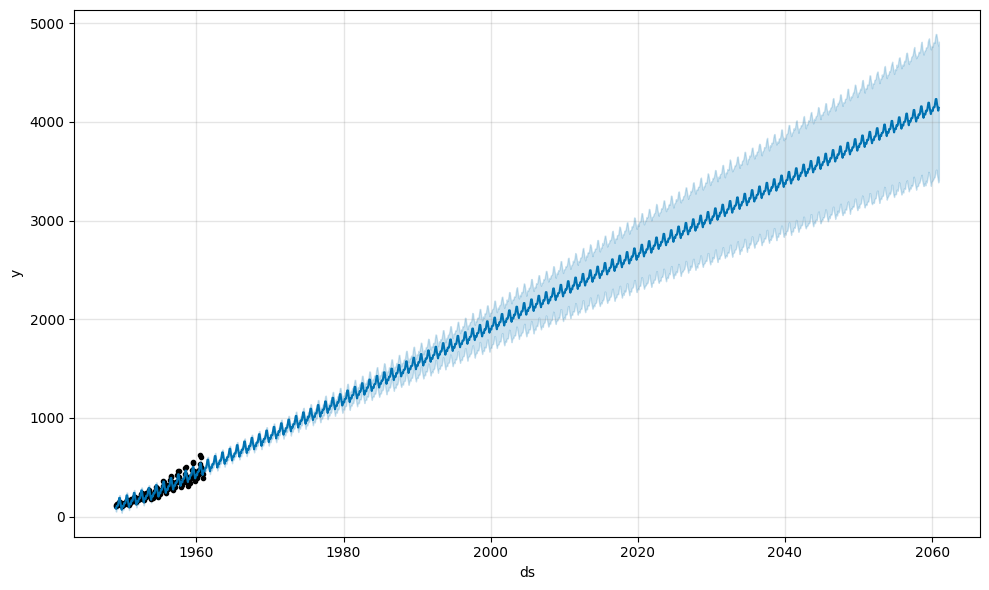

In [24]:
m.plot(forecast)